In [36]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score


import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

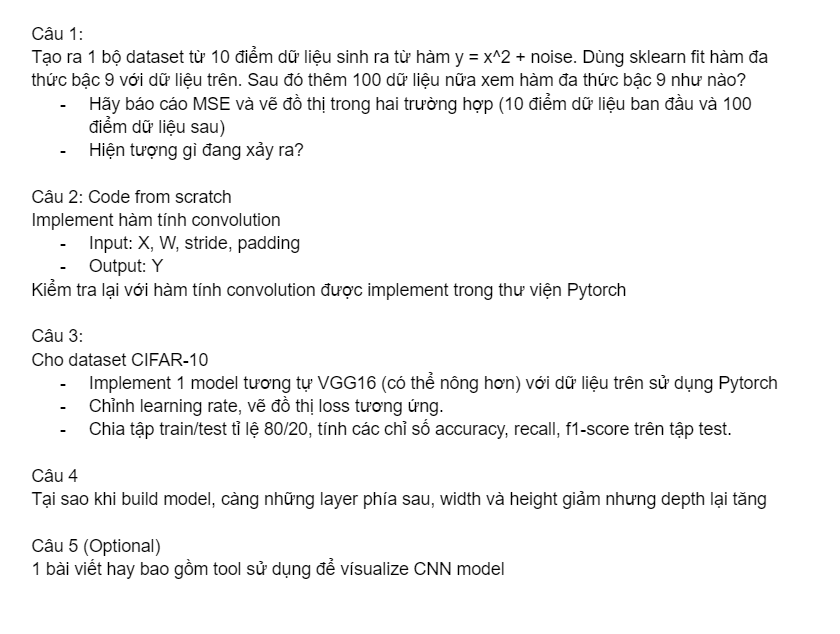

MSE trên dữ liệu ban đầu: 0.0000
MSE trên dữ liệu mới: 0.1009


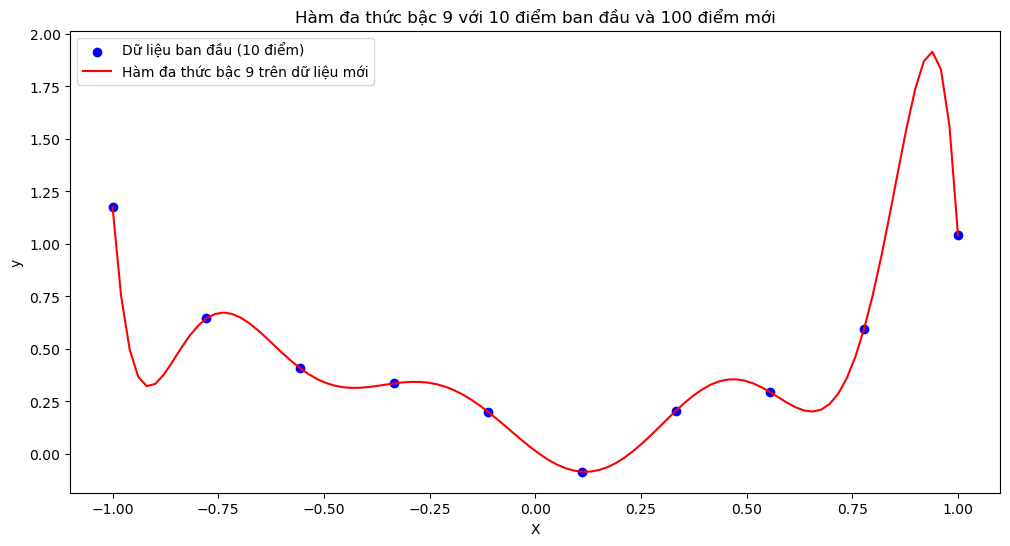

In [15]:
# Tạo dữ liệu ban đầu với 10 điểm
np.random.seed(0)
X_original = np.linspace(-1, 1, 10)  # Tạo 10 điểm từ 0 đến 1
y_original = X_original**2 + np.random.normal(0, 0.1, 10)  # Hàm y = x^2 + noise

# Fit dữ liệu ban đầu vào hàm đa thức bậc 9 
poly = PolynomialFeatures(degree=9)
X_poly = poly.fit_transform(X_original.reshape(-1, 1))
regressor = LinearRegression()
regressor.fit(X_poly, y_original)

# Đánh giá mô hình trên dữ liệu ban đầu
y_pred_original = regressor.predict(X_poly)
mse_original = mean_squared_error(y_original, y_pred_original)

# Tạo thêm 100 điểm dữ liệu
X_new = np.linspace(-1, 1, 100)
y_new = X_new**2 + np.random.normal(0, 0.1, 100)  # Hàm y = x^2 + noise

# Transform dữ liệu mới theo hàm đa thức
X_poly_new = poly.transform(X_new.reshape(-1, 1))

# Đánh giá mô hình trên dữ liệu mới
y_pred_new = regressor.predict(X_poly_new)
mse_new = mean_squared_error(y_new, y_pred_new)

# In ra MSE và vẽ đồ thị
print(f"MSE trên dữ liệu ban đầu: {mse_original:.4f}")
print(f"MSE trên dữ liệu mới: {mse_new:.4f}")

plt.figure(figsize=(12, 6))
plt.scatter(X_original, y_pred_original, label='Dữ liệu ban đầu (10 điểm)', color='blue')
plt.plot(X_new, y_pred_new, label='Hàm đa thức bậc 9 trên dữ liệu mới', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Hàm đa thức bậc 9 với 10 điểm ban đầu và 100 điểm mới')
plt.show()


Hiện tượng xảy ra: model bị overfitting do sử dụng mô hình đa thức bậc quá cao. Khi mô hình quá khớp, nó tạo ra một đường cong đa thức vô cùng phức tạp để đi qua tất cả các điểm dữ liệu huấn luyện. Kết quả là, nó có thể không dự đoán tốt trên các điểm dữ liệu mới mà nó chưa từng thấy trong quá trình huấn luyện. MSE trên dữ liệu mới cao hơn là một dấu hiệu của sự không tổng quát của mô hình.

In [16]:
## EX 2

In [17]:
def convolution(X, W, stride=1, padding=0):
    # Kích thước của đầu vào và kernel
    m, n = X.shape
    k_row, k_col = W.shape
    
    # Tính kích thước của đầu ra
    out_m = (m - k_row + 2 * padding) // stride + 1
    out_n = (n - k_col + 2 * padding) // stride + 1
    
    # Khởi tạo ma trận đầu ra
    Y = np.zeros((out_m, out_n))
    
    # Thực hiện convolution
    for i in range(0, m - k_row + 1, stride):
        for j in range(0, n - k_col + 1, stride):
            Y[i//stride, j//stride] = np.sum(X[i:i+k_row, j:j+k_col] * W)
    
    return Y


In [18]:
# Tạo ma trận đầu vào X và kernel W
X = np.array([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 0],
             [0, 1, 1, 0, 0]])

W = np.array([[1, 0, 1],
              [0, 1, 0],
             [1, 0, 1]])

# Gọi hàm convolution
Y = convolution(X, W, stride=1, padding=0)

print(Y)


[[4. 3. 4.]
 [2. 4. 3.]
 [2. 3. 4.]]


In [19]:

# Tạo tensor đầu vào và kernel
X = torch.tensor([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 0],
             [0, 1, 1, 0, 0]], dtype=torch.float32, requires_grad=True)

W = torch.tensor([[1, 0, 1],
                  [0, 1, 0],
                 [1, 0, 1]], dtype=torch.float32, requires_grad=True)

# Thêm chiều batch và chiều channel cho tensor đầu vào
X = X.unsqueeze(0).unsqueeze(0)  # Thêm chiều batch và chiều channel

# Sử dụng hàm conv2d
Y = F.conv2d(X, W.view(1, 1, 3, 3), stride=1, padding=0)

# In kết quả
print(Y)


tensor([[[[4., 3., 4.],
          [2., 4., 3.],
          [2., 3., 4.]]]], grad_fn=<ConvolutionBackward0>)


In [ ]:
## EX3

In [31]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define a function to create a VGG-like model
def create_vgg_like_model():
    model = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(128, 128, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        
        nn.Conv2d(128, 256, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        
        nn.Conv2d(256, 512, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(512, 512, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(512, 512, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    
    classifier = nn.Sequential(
        nn.Linear(512 * 2 * 2, 4096),  # Adjust the input size
        nn.ReLU(inplace=True),
        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(),
        nn.Linear(4096, 10)  # 10 classes for CIFAR-10
    )
    
    return model, classifier


# Create the model
model, classifier = create_vgg_like_model()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(list(model.parameters()) + list(classifier.parameters()), lr=0.001, momentum=0.9)

# Initialize an empty list to store the loss values
train_losses = []

# Training loop
def train_model(model, classifier, trainloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = model(inputs)
            outputs = outputs.view(outputs.size(0), -1)  # Flatten the tensor
            outputs = classifier(outputs)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate the average loss for the epoch
        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)

        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

    print("Training finished")


Epoch 1, Loss: 2.3029
Epoch 2, Loss: 2.3029
Epoch 3, Loss: 2.3028
Epoch 4, Loss: 2.3029
Epoch 5, Loss: 2.3029
Epoch 6, Loss: 2.3028
Epoch 7, Loss: 2.3028
Epoch 8, Loss: 2.3028
Training finished


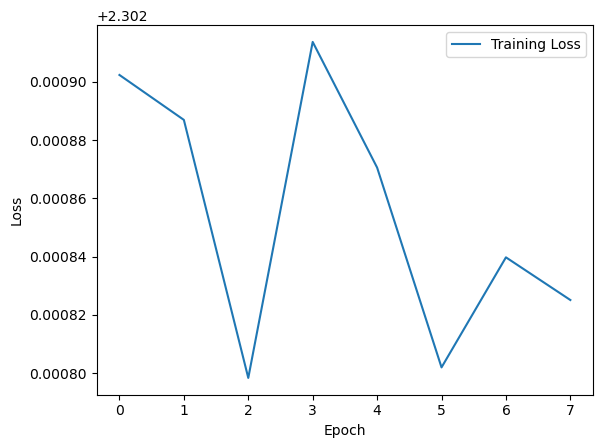

In [30]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(list(model.parameters()) + list(classifier.parameters()), lr=0.001, momentum=0.9)

# Train the model
train_model(model, classifier, trainloader, criterion, optimizer, num_epochs=8)

# Evaluate the model on the test set
#evaluate_model(model, classifier, testloader)


# Plot the loss curve
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1, Loss: 2.3195
Epoch 2, Loss: 2.3208
Epoch 3, Loss: 2.3197
Epoch 4, Loss: 2.3205
Epoch 5, Loss: 2.3210
Epoch 6, Loss: 2.3188
Epoch 7, Loss: 2.3199
Epoch 8, Loss: 2.3227
Training finished


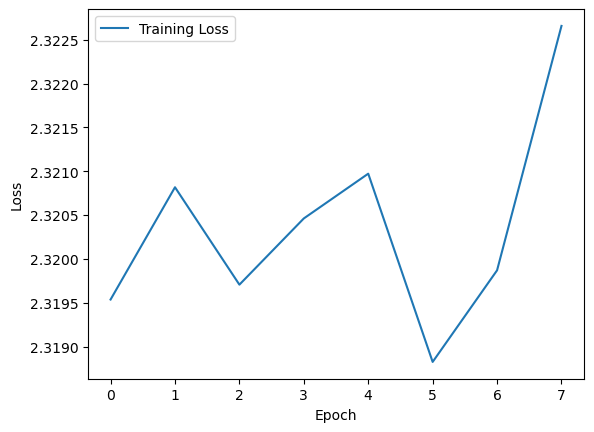

In [33]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(list(model.parameters()) + list(classifier.parameters()), lr=0.5, momentum=0.9)

# Train the model
train_model(model, classifier, trainloader, criterion, optimizer, num_epochs=8)

# Evaluate the model on the test set
#evaluate_model(model, classifier, testloader)


# Plot the loss curve
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [44]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data, labels = trainset.data, trainset.targets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Đưa dữ liệu vào Tensor và chuyển về định dạng phù hợp
X_test = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2)  # Chuyển về định dạng (N, C, H, W)
y_test = torch.tensor(y_test, dtype=torch.long)


In [47]:
model, classifier = create_vgg_like_model()  # Define your model here

# Evaluate the model on the test set
def evaluate_model(model, classifier, X_test, y_test):
    model.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            inputs = X_test[i:i + batch_size]
            labels = y_test[i:i + batch_size]

            outputs = model(inputs)
            outputs = outputs.view(outputs.size(0), -1)  # Flatten the tensor
            outputs = classifier(outputs)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    print(f"Accuracy on test set: {accuracy:.2f}%")

    # Calculate recall and F1-score
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"Recall on test set: {recall:.2f}")
    print(f"F1-score on test set: {f1:.2f}")

# Set batch_size according to your requirements
batch_size = 64

# Call the evaluate_model function with your model and the test data
evaluate_model(model, classifier, X_test, y_test)


Accuracy on test set: 10.39%
Recall on test set: 0.10
F1-score on test set: 0.07


In [ ]:
## EX 4

As the number of layers in a convolutional neural network (CNN) increases, the height and width of the output feature maps tend to decrease, while the depth increases. This is because:

- Height and width decrease to reduce the amount of information that needs to be processed. The later layers typically process information at a higher level, and therefore need less information to make a decision.
- Depth increases to increase the model's expressive power. Each layer in a CNN can be thought of as a function that maps from the input space to the output space. When depth increases, the model can learn more complex functions, and therefore can represent more complex objects.

Specifically, height and width decrease due to the pooling operations applied in the later layers. Pooling is a transformation that reduces the size of the input feature map by taking the average, maximum, or minimum value of a subregion. This size reduction helps to reduce the amount of information that needs to be processed, which can help the model to learn faster and more efficiently.

Depth increases due to the convolution operations applied in the later layers. Convolution is a transformation that applies a filter to the input feature map to produce an output feature map. When depth increases, the model can learn more complex filters, and therefore can represent more complex objects.